<a href="https://colab.research.google.com/github/Swathi-Thandavarayan/STORE-DATA-PREDICTION/blob/main/STORE_DATA_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROBLEM STATEMENT

Predict the department-wide sales for each store for the following year.

Model the effects of markdowns on holiday weeks.

Provide recommended actions based on the insights drawn, with prioritisation placed on largest business impact


You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

# ≣ Variables in the Dataset :
  Store:
      ✤ Store : store number
      ✤ TYpe : type of store
      ✤ Size : size of store
  Feature:
      ✤ Store - the store number
      ✤ Date - the week
      ✤  Temperature - average temperature in the region
      ✤  Fuel_Price - cost of fuel in the region
      ✤  MarkDown1-5 - anonymized data related to promotional  
      ✤  CPI - the consumer price index
      ✤  Unemployment - the unemployment rate
      ✤  IsHoliday - whether the week is a special holiday week
  Sales:
      ✤ Store - the store number
      ✤  Dept - the department number
      ✤  Date - the week
      ✤  Weekly_Sales -  sales for the given department in the give store
      ✤  IsHoliday - whether the week is a special holiday week


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
pip install lazypredict

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#DATA IMPORT

In [ ]:
path1 = '/content/drive/My Drive/DATA/Features_data_set.csv'
path2 = '/content/drive/My Drive/DATA/sales_data_set.csv'
path3 = '/content/drive/My Drive/DATA/stores_data_set.csv'
data_feature = pd.read_csv(path1)
data_sales = pd.read_csv(path2)
data_stores = pd.read_csv(path3)

In [ ]:
data_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False
1,1,12/02/2010,38.51,2.55,NaN,NaN,NaN,NaN,NaN,211.24,8.11,True
2,1,19/02/2010,39.93,2.51,NaN,NaN,NaN,NaN,NaN,211.29,8.11,False
3,1,26/02/2010,46.63,2.56,NaN,NaN,NaN,NaN,NaN,211.32,8.11,False
4,1,05/03/2010,46.50,2.62,NaN,NaN,NaN,NaN,NaN,211.35,8.11,False


In [ ]:
data_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
data_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
data_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
data_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#DATA MERGING

In [ ]:
merged_df = pd.merge(data_feature, data_sales, on=['Store','Date','IsHoliday'])
merged_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,1,24924.50
1,1,05/02/2010,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,2,50605.27
2,1,05/02/2010,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,3,13740.12
3,1,05/02/2010,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,4,39954.04
4,1,05/02/2010,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,False,93,2487.80
421566,45,26/10/2012,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,False,94,5203.31
421567,45,26/10/2012,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,False,95,56017.47
421568,45,26/10/2012,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,False,97,6817.48


#MERGED DATA

In [ ]:
stores_data = pd.merge(merged_df, data_stores, on='Store')
stores_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,False,5,32229.38,A,151315


In [ ]:
stores_data.shape

(421570, 16)

In [ ]:
stores_data.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

# DATA CLEANING

##stores_data

shape
dtype
null
describe
duplicates

In [ ]:
stores_data.shape

(421570, 16)

In [ ]:
stores_data.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Dept              int64
Weekly_Sales    float64
Type             object
Size              int64
dtype: object

In [ ]:
stores_data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Type', 'Size'],
      dtype='object')

###store

In [ ]:
stores_data.Store.dtype

dtype('int64')

In [ ]:
stores_data.Store.isnull().sum()

0

In [ ]:
stores_data.Store.describe()

count   421570.00
mean        22.20
std         12.79
min          1.00
25%         11.00
50%         22.00
75%         33.00
max         45.00
Name: Store, dtype: float64

In [ ]:
stores_data.Store.nunique()

45

In [ ]:
stores_data.Store.value_counts()

Store
13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: count, dtype: int64

IQR

In [ ]:
q3 = stores_data.Store.quantile(.75)
q1 = stores_data.Store.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(66.0, -22.0)

###Date

In [ ]:
stores_data.Date.value_counts()

Date
23/12/2011    3027
25/11/2011    3021
16/12/2011    3013
09/12/2011    3010
17/02/2012    3007
              ... 
09/07/2010    2903
16/07/2010    2901
20/08/2010    2901
27/08/2010    2898
13/08/2010    2896
Name: count, Length: 143, dtype: int64

In [ ]:
##
#stores_data.Date.loc[(stores_data.Date == 05/02/2010), :]

In [ ]:
stores_data['Date'] = pd.to_datetime(stores_data['Date'], format='%d/%m/%Y')

In [ ]:
stores_data.Date.dtype

dtype('<M8[ns]')

In [ ]:
stores_data.Date.isnull().sum()

0

In [ ]:
stores_data.Date.describe()

count                           421570
mean     2011-06-18 08:30:31.963375360
min                2010-02-05 00:00:00
25%                2010-10-08 00:00:00
50%                2011-06-17 00:00:00
75%                2012-02-24 00:00:00
max                2012-10-26 00:00:00
Name: Date, dtype: object

###Temperature

In [ ]:
stores_data.Temperature.isnull().sum()

0

In [ ]:
stores_data.Temperature.describe()

count   421570.00
mean        60.09
std         18.45
min         -2.06
25%         46.68
50%         62.09
75%         74.28
max        100.14
Name: Temperature, dtype: float64

In [ ]:
q3 = stores_data.Temperature.quantile(.75)
q1 = stores_data.Temperature.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold, upper_threshold

(5.279999999999994, 115.68)

In [ ]:
sum(stores_data.Temperature < lower_threshold )

69

In [ ]:
stores_data.loc[(stores_data.Temperature < lower_threshold),:]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
62553,7,2011-02-04,-2.06,3.01,NaN,NaN,NaN,NaN,NaN,191.76,8.82,False,1,8976.04,B,70713
62554,7,2011-02-04,-2.06,3.01,NaN,NaN,NaN,NaN,NaN,191.76,8.82,False,2,21568.46,B,70713
62555,7,2011-02-04,-2.06,3.01,NaN,NaN,NaN,NaN,NaN,191.76,8.82,False,3,7555.18,B,70713
62556,7,2011-02-04,-2.06,3.01,NaN,NaN,NaN,NaN,NaN,191.76,8.82,False,4,15306.89,B,70713
62557,7,2011-02-04,-2.06,3.01,NaN,NaN,NaN,NaN,NaN,191.76,8.82,False,5,12835.06,B,70713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62617,7,2011-02-04,-2.06,3.01,NaN,NaN,NaN,NaN,NaN,191.76,8.82,False,94,-2.50,B,70713
62618,7,2011-02-04,-2.06,3.01,NaN,NaN,NaN,NaN,NaN,191.76,8.82,False,95,33881.30,B,70713
62619,7,2011-02-04,-2.06,3.01,NaN,NaN,NaN,NaN,NaN,191.76,8.82,False,96,1412.71,B,70713
62620,7,2011-02-04,-2.06,3.01,NaN,NaN,NaN,NaN,NaN,191.76,8.82,False,97,4601.19,B,70713


In [ ]:
# since there are values below the lower threshold (only 7 vlalues hence impute)
stores_data.Temperature = stores_data.Temperature.clip(lower_threshold, upper_threshold)

In [ ]:
stores_data.Temperature.describe()

count   421570.00
mean        60.09
std         18.44
min          5.28
25%         46.68
50%         62.09
75%         74.28
max        100.14
Name: Temperature, dtype: float64

In [ ]:
stores_data.Temperature.nunique()

3528

###Fuel_Price

In [ ]:
stores_data.Fuel_Price.isnull().sum()

0

In [ ]:
stores_data.Fuel_Price.describe()

count   421570.00
mean         3.36
std          0.46
min          2.47
25%          2.93
50%          3.45
75%          3.74
max          4.47
Name: Fuel_Price, dtype: float64

In [ ]:
q3 = stores_data.Fuel_Price.quantile(.75)
q1 = stores_data.Fuel_Price.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold,upper_threshold #hence no outliers

(1.7254999999999996, 4.9455)

In [ ]:
##from google.colab import drive
#drive.mount('/content/drive')

hence no outliers

###MarkDown1

In [ ]:
stores_data.MarkDown1.isnull().sum()

270889

In [ ]:
stores_data.MarkDown1.dtype

dtype('float64')

In [ ]:
stores_data.MarkDown1.value_counts()

MarkDown1
1.50       102
460.73     102
175.64      93
9264.48     75
1483.17     75
          ... 
196.40      42
243.47      42
512.15      42
318.51      42
945.96      42
Name: count, Length: 2277, dtype: int64

In [ ]:
stores_data.MarkDown1.fillna(0, inplace = True)
stores_data.MarkDown2.fillna(0, inplace = True)
stores_data.MarkDown3.fillna(0, inplace = True)
stores_data.MarkDown4.fillna(0, inplace = True)
stores_data.MarkDown5.fillna(0, inplace = True)

###CPI

In [ ]:
stores_data.CPI.dtype

dtype('float64')

In [ ]:
stores_data.CPI.value_counts()

CPI
129.86    711
131.11    708
129.85    707
130.38    706
130.65    706
         ... 
203.83     45
213.17     44
207.62     44
207.50     44
211.59     44
Name: count, Length: 2145, dtype: int64

In [ ]:
stores_data.CPI.nunique()

2145

In [ ]:
stores_data.CPI.describe()

count   421570.00
mean       171.20
std         39.16
min        126.06
25%        132.02
50%        182.32
75%        212.42
max        227.23
Name: CPI, dtype: float64

In [ ]:
q3 = stores_data.CPI.quantile(.75)
q1 = stores_data.CPI.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold,upper_threshold #hence no outliers

(11.431177550000001, 333.00848195000003)

In [ ]:
stores_data.CPI.loc[stores_data.CPI < lower_threshold].value_counts().sum()

0

###Unemployment

In [ ]:
stores_data.Unemployment.dtype

dtype('float64')

In [ ]:
stores_data.Unemployment.nunique()

349

###IsHoliday

In [ ]:
stores_data.IsHoliday.value_counts()

IsHoliday
False    391909
True      29661
Name: count, dtype: int64

In [ ]:
stores_data.IsHoliday.dtype

dtype('bool')

In [ ]:
stores_data.IsHoliday = stores_data.IsHoliday.astype('bool')

In [ ]:
stores_data.IsHoliday.dtype

dtype('bool')

###Dept                

In [ ]:
stores_data.Dept.dtype

dtype('int64')

In [ ]:
stores_data.Dept.nunique()

81

###Weekly_Sales

In [ ]:
stores_data.Weekly_Sales.dtype

dtype('float64')

In [ ]:
stores_data.Weekly_Sales.value_counts()

Weekly_Sales
10.00      353
5.00       289
20.00      232
15.00      215
12.00      175
          ... 
3268.34      1
3520.24      1
5072.07      1
501.51       1
1076.80      1
Name: count, Length: 359464, dtype: int64

In [ ]:
stores_data.Weekly_Sales.describe()

count   421570.00
mean     15981.26
std      22711.18
min      -4988.94
25%       2079.65
50%       7612.03
75%      20205.85
max     693099.36
Name: Weekly_Sales, dtype: float64

###Type

In [ ]:
stores_data.Type.dtype

dtype('O')

In [ ]:
stores_data['Type'] = stores_data['Type'].astype(str)

In [ ]:
stores_data.Type.dtype

dtype('O')

In [ ]:
stores_data.Type.unique()

array(['A', 'B', 'C'], dtype=object)

###Size

In [ ]:
stores_data.Size.dtype

dtype('int64')

In [ ]:
stores_data.Size.nunique()

40

#DATA VISUALISATION

In [ ]:
# Dependent - Weekly_Sales
# Supervised Regression model

#continuous_columns = ['Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
#                      'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
#category_columns = ["Store",  "Type",   "IsHoliday", "Dept"]



In [ ]:
# Dependent - Weekly_Sales
# Supervised Regression model

# continuous_columns = ['Weekly_Sales', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
#                       'MarkDown4', 'MarkDown5']
# category_columns = ["Store","Date" , "Type",  'Temperature','CPI','Unemployment',  "IsHoliday", "Dept",'Size']


###catogorical columns

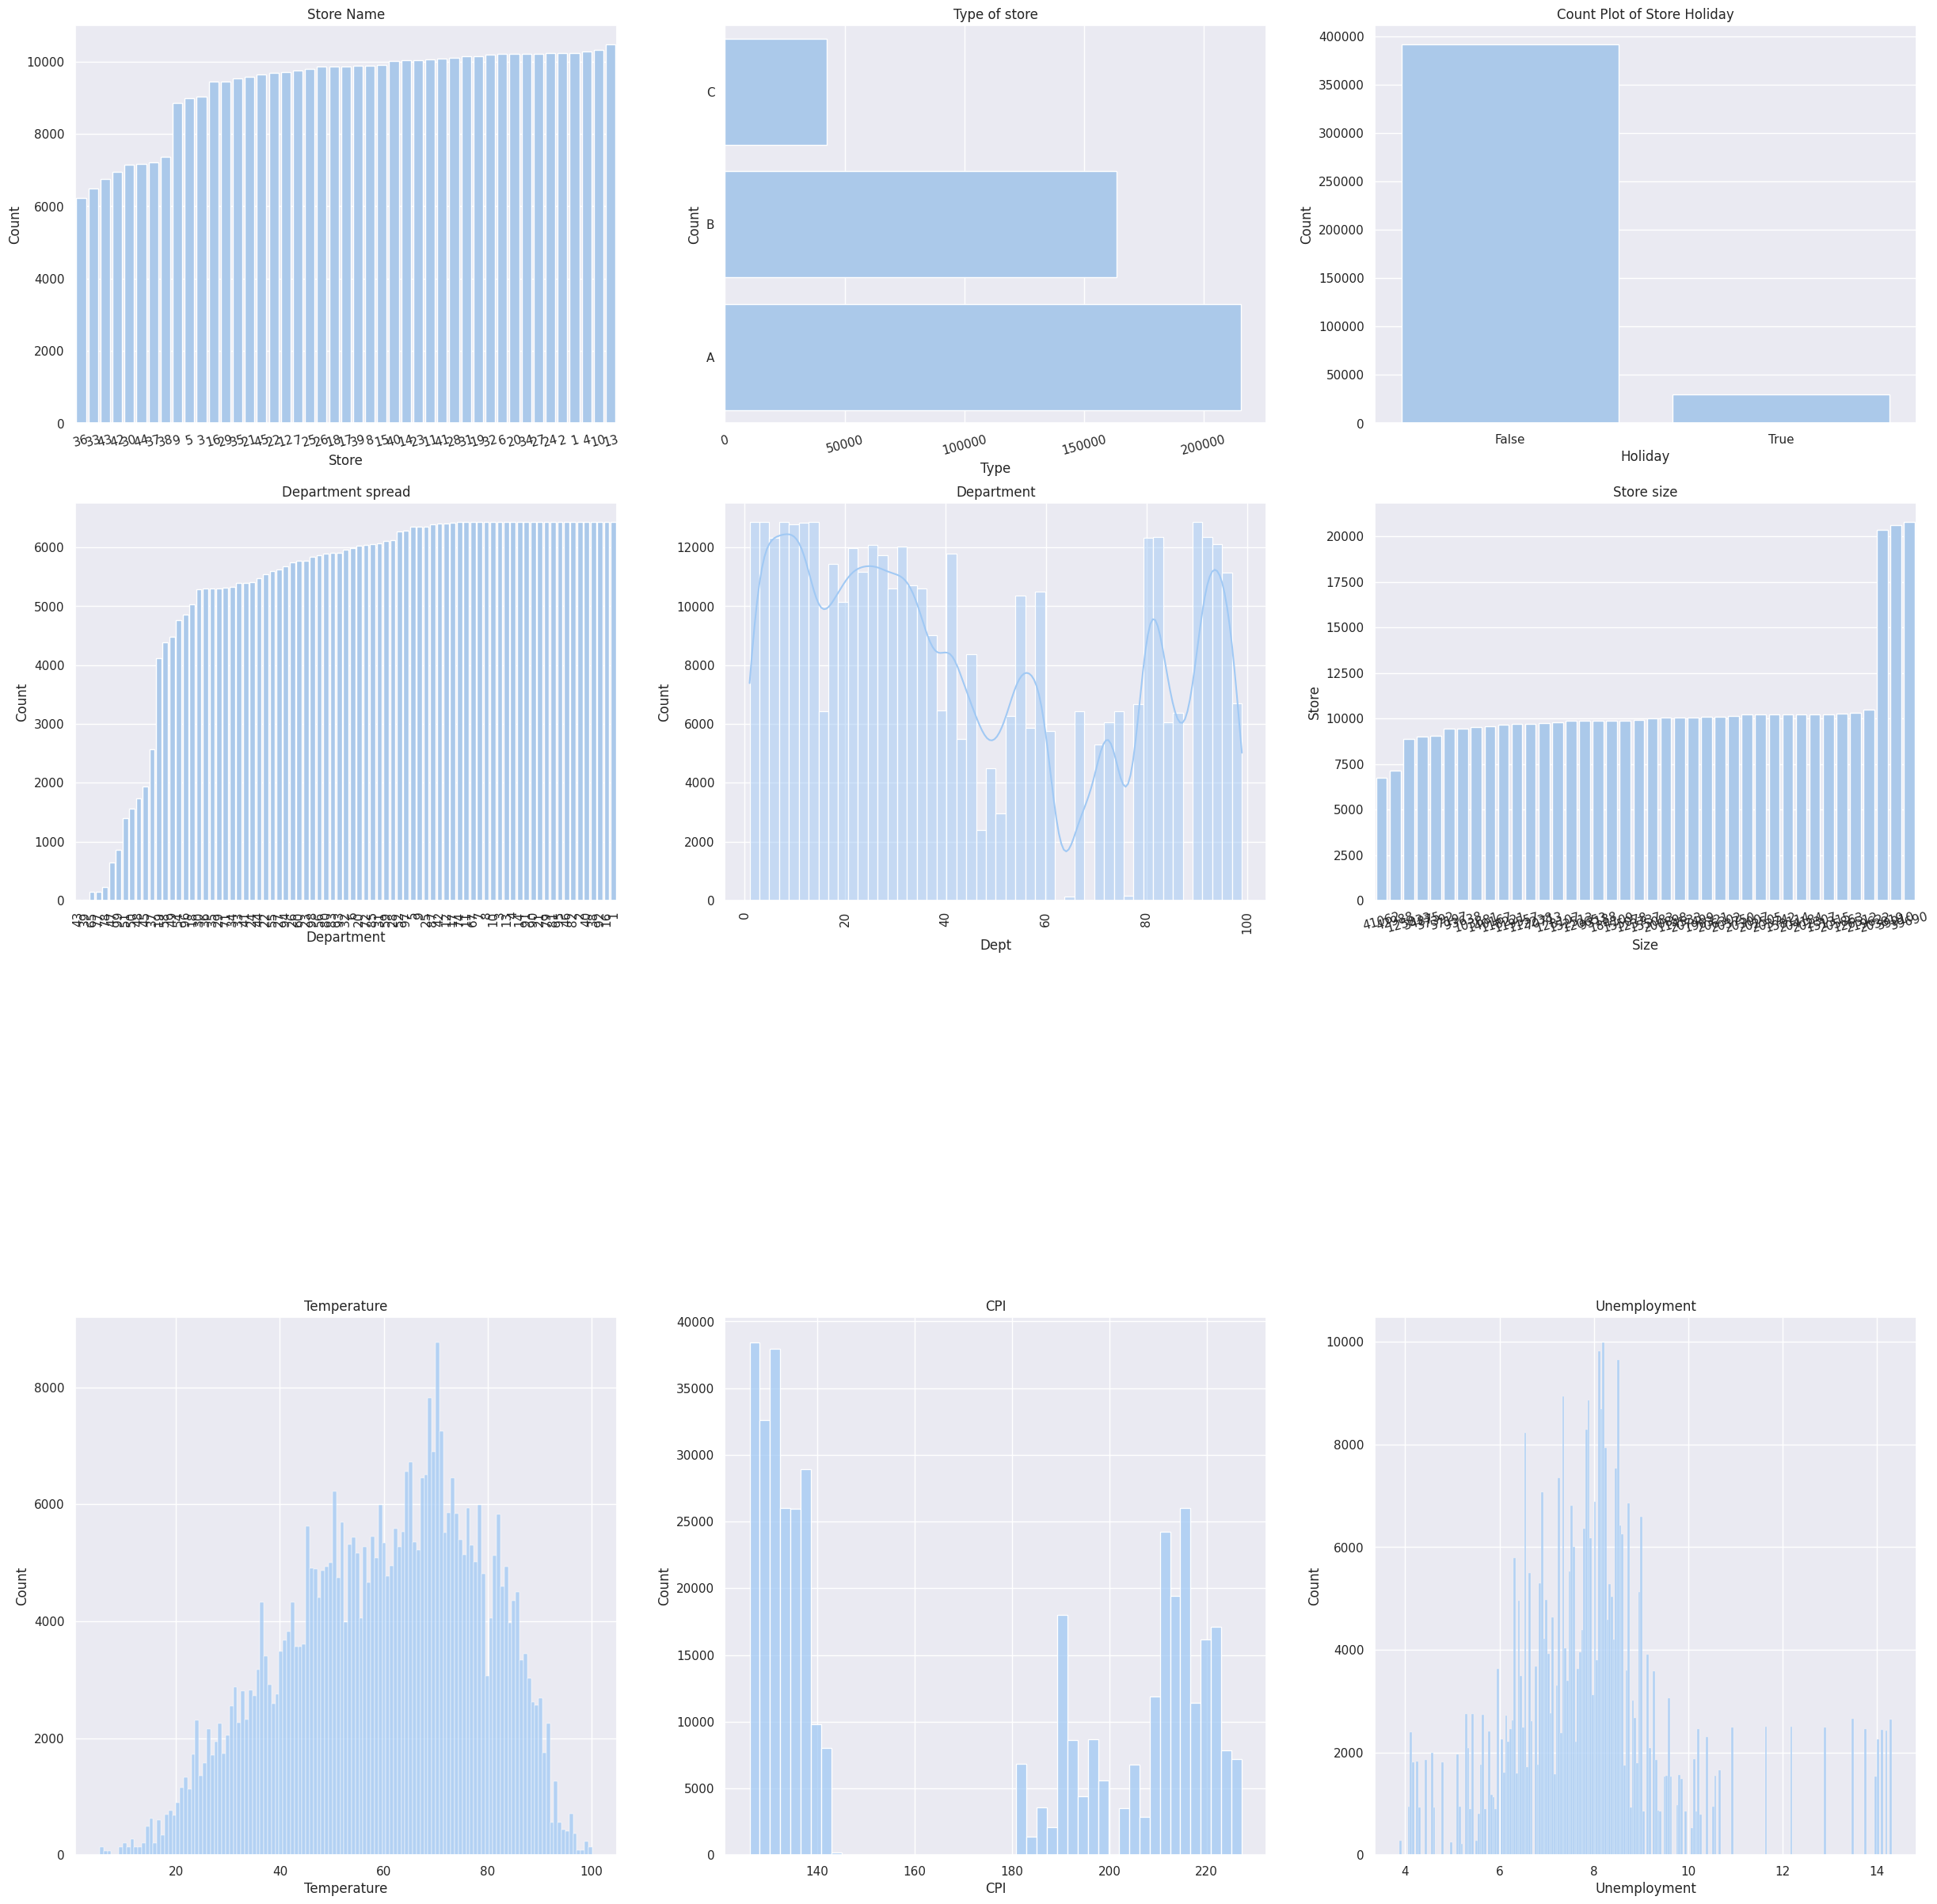

In [ ]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,30))

plt.subplot(431)
sns.countplot(x = 'Store', data = stores_data,order=stores_data['Store'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Store')
plt.ylabel('Count')
plt.title('Store Name')

plt.subplot(432)
sns.countplot(stores_data['Type'],order=stores_data['Type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type of store')

plt.subplot(433)
sns.countplot(x='IsHoliday', data=stores_data)
plt.title('Count Plot of Store Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')

plt.subplot(434)
sns.countplot(x='Dept', data=stores_data,order=stores_data['Dept'].value_counts().index[::-1])
plt.title('Department spread')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)


plt.subplot(435)
sns.histplot(data=stores_data, x=stores_data.Dept, kde=True, bins=50)
plt.xticks(rotation=90)
plt.xlabel('Dept')
plt.ylabel('Count')
plt.title('Department')

plt.subplot(436)
sns.countplot(x='Size', data=stores_data,order=stores_data['Size'].value_counts().index[::-1])
plt.title('Store size')
plt.xlabel('Size')
plt.ylabel('Store')
plt.xticks(rotation=15)

plt.subplot(337)
sns.histplot(stores_data['Temperature'])
plt.title('Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')


plt.subplot(338)
sns.histplot(stores_data['CPI'])
plt.title('CPI')

plt.subplot(339)
sns.histplot(stores_data['Unemployment'])
plt.title('Unemployment')

plt.tight_layout()
plt.show()

####interpretations
1. type A store are higher

###continous columns

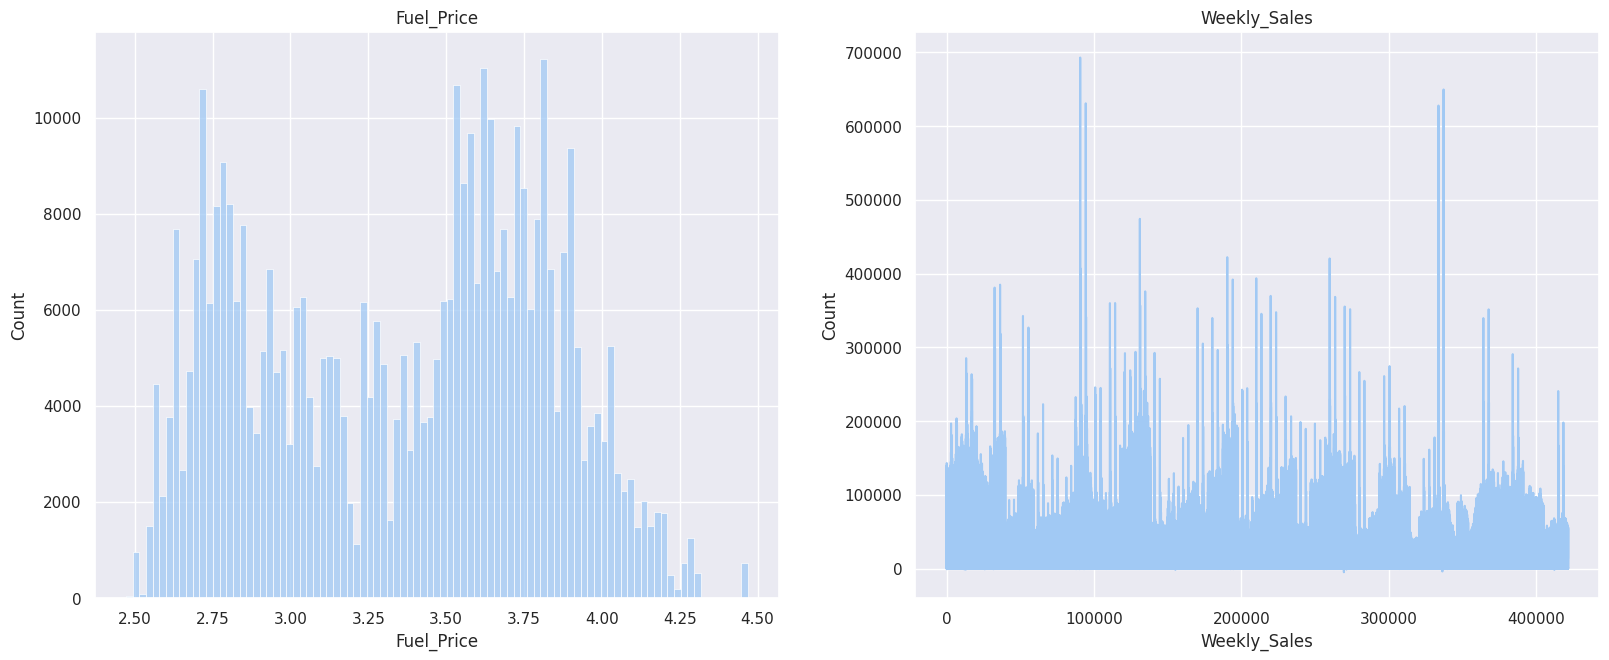

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,25))

plt.subplot(331)
sns.histplot(stores_data['Fuel_Price'])
plt.title('Fuel_Price')
plt.xlabel('Fuel_Price')
plt.ylabel('Count')

plt.subplot(332)
sns.lineplot(stores_data['Weekly_Sales'])
plt.title('Weekly_Sales')
plt.xlabel('Weekly_Sales')
plt.ylabel('Count')


plt.show()
plt.tight_layout()

###FEATURE VS TARGET

cat vs target

category_columns = ["Store","Date" ,'Temperature','CPI','Unemployment',  "IsHoliday", "Dept","Type",'Size']

In [ ]:
Date_order = stores_data.groupby('Date')['Weekly_Sales'].mean().reset_index()
Date_order = Date_order.sort_values('Weekly_Sales')
Temperature_order = stores_data.groupby('Temperature')['Weekly_Sales'].mean().reset_index().sort_values('Weekly_Sales')['Temperature']
cpi_order = stores_data.groupby('CPI')['Weekly_Sales'].mean().reset_index().sort_values('Weekly_Sales')['CPI']

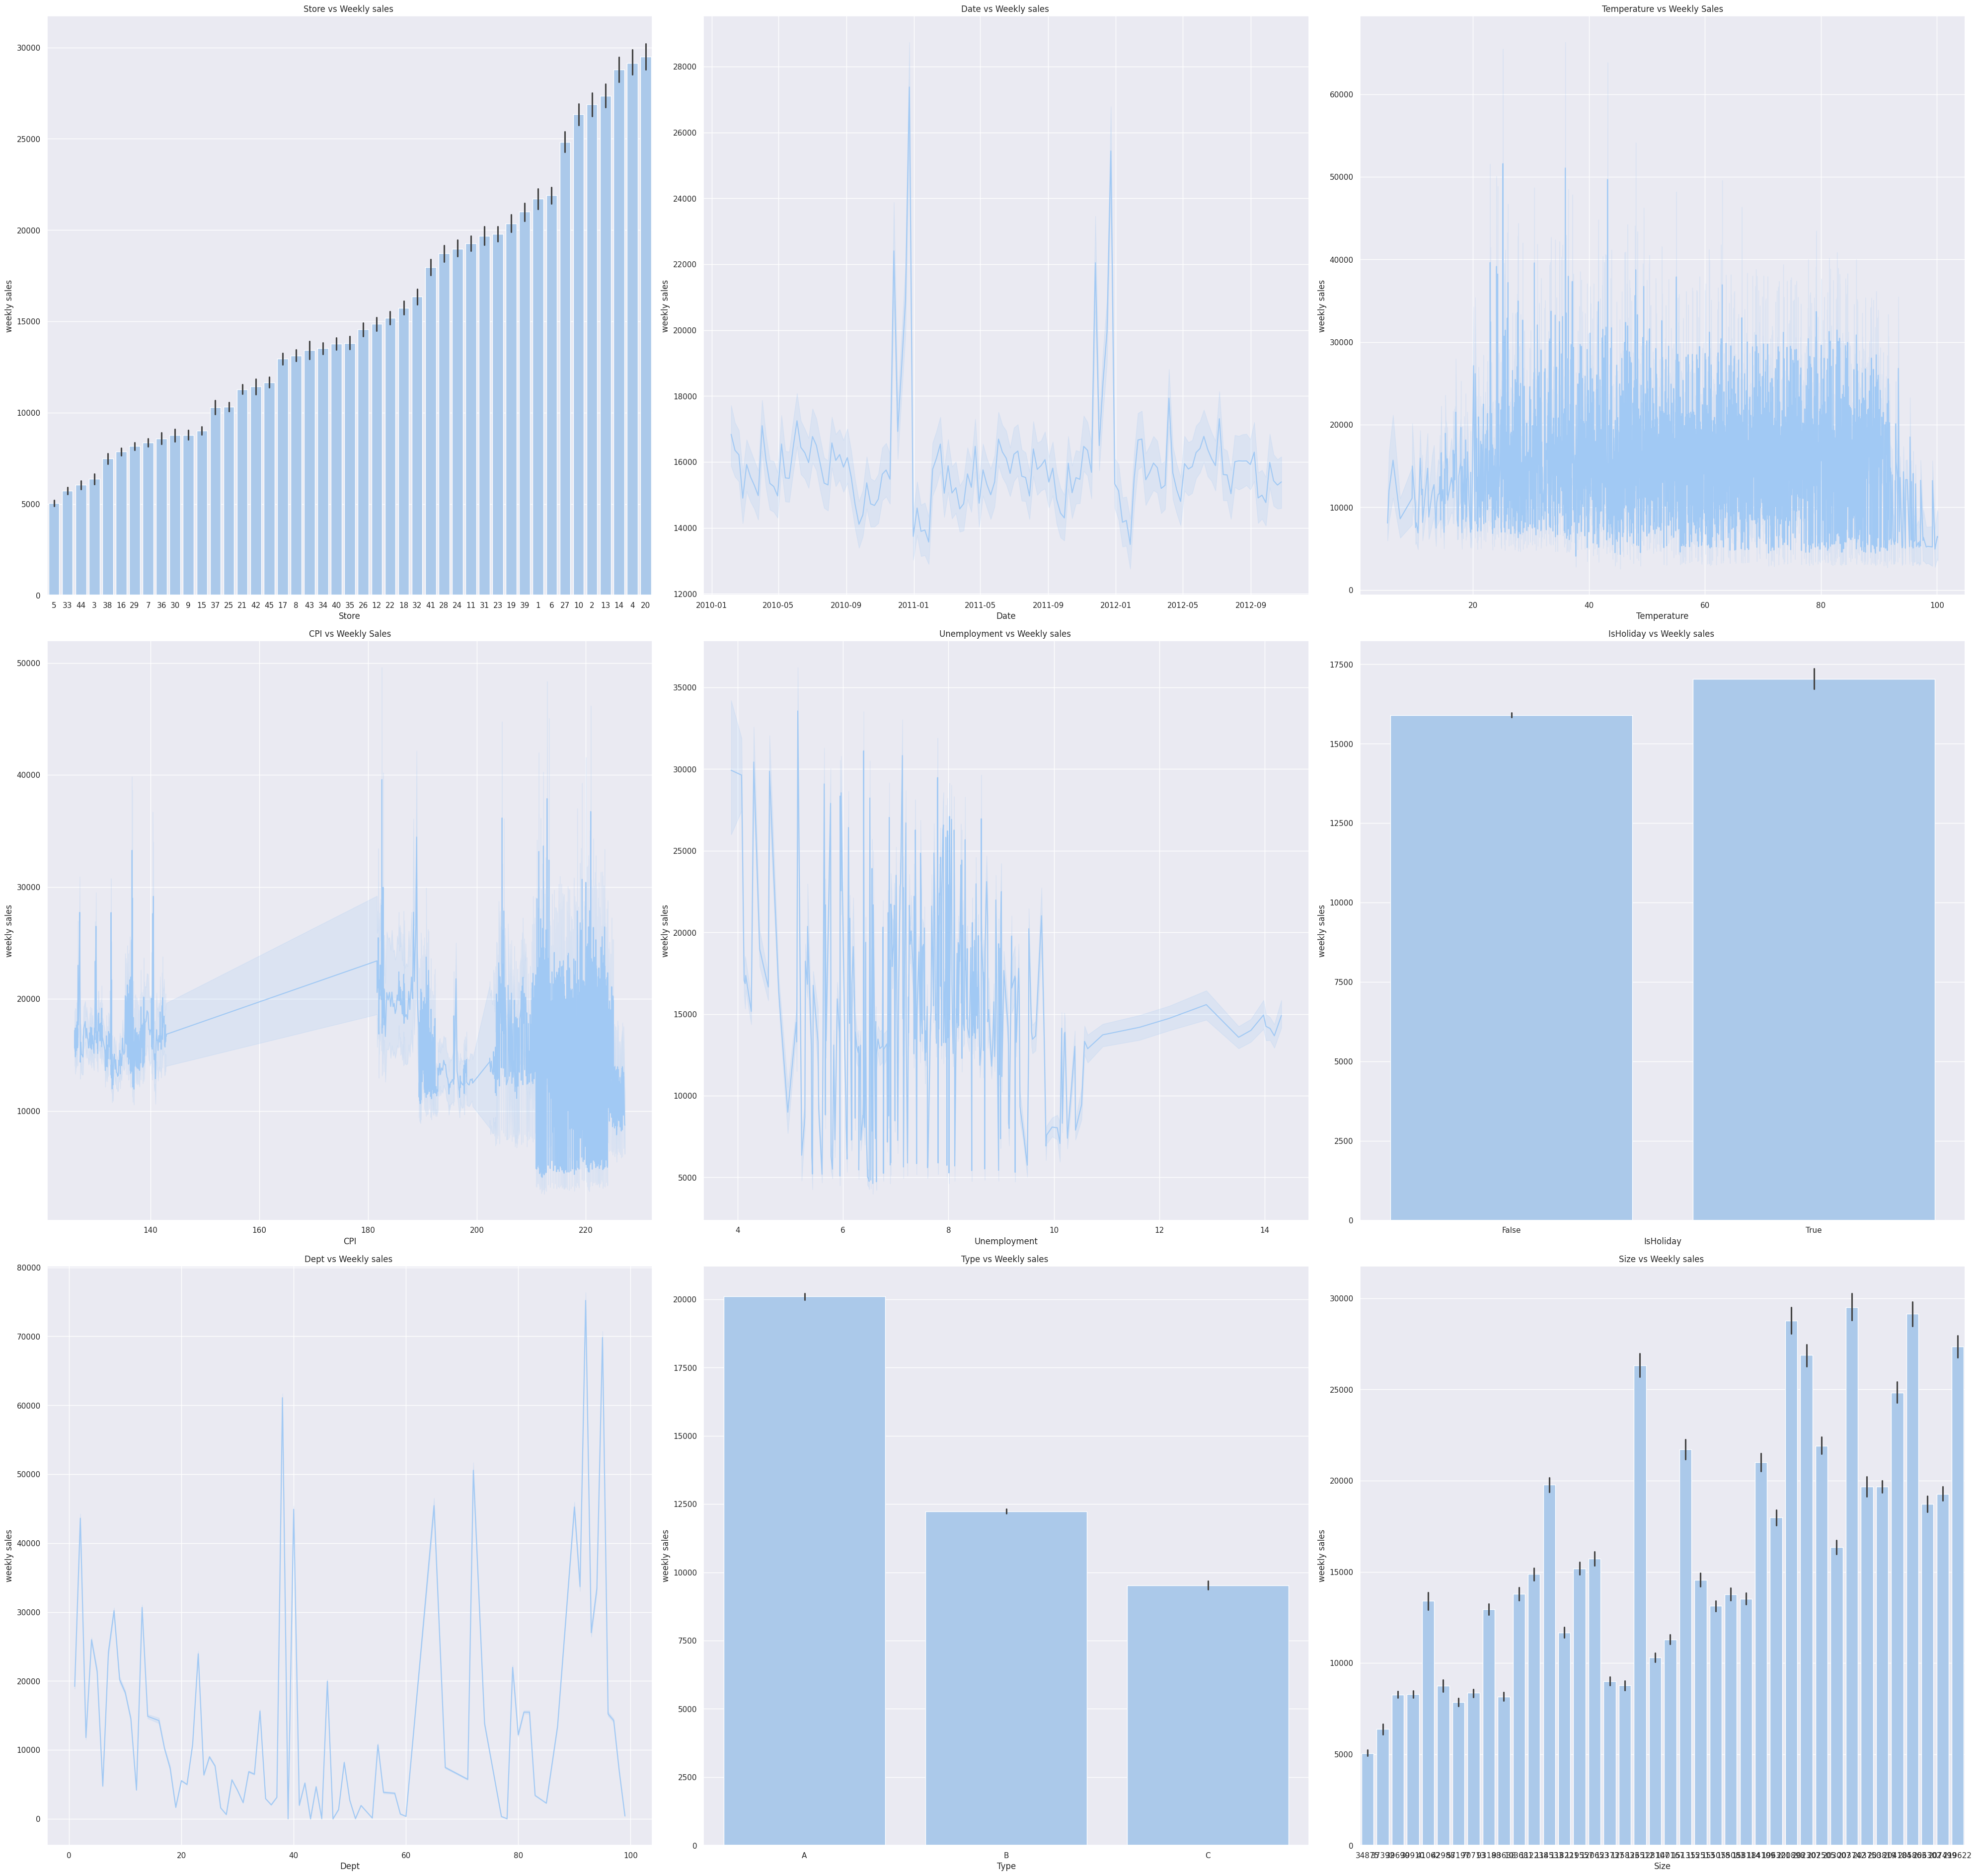

In [ ]:
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(40,50))

plt.subplot(431)
sns.barplot(x = 'Store',y = 'Weekly_Sales', data=stores_data, order = stores_data.groupby('Store')['Weekly_Sales'].mean().reset_index().sort_values('Weekly_Sales')['Store'])
plt.xlabel('Store')
plt.ylabel('weekly sales')
plt.title('Store vs Weekly sales ')

plt.subplot(432)
sns.lineplot(x = 'Date',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Date')
plt.ylabel('weekly sales')
plt.title('Date vs Weekly sales ')

plt.subplot(433)
sns.lineplot(x = 'Temperature',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('Temperature')
plt.ylabel('weekly sales')
plt.title('Temperature vs Weekly Sales')

plt.subplot(434)
sns.lineplot(x = 'CPI',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('CPI')
plt.ylabel('weekly sales')
plt.title('CPI vs Weekly Sales')

plt.subplot(435)
sns.lineplot(x = 'Unemployment',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Unemployment')
plt.ylabel('weekly sales')
plt.title('Unemployment vs Weekly sales ')

plt.subplot(436)
sns.barplot(x = 'IsHoliday',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('IsHoliday')
plt.ylabel('weekly sales')
plt.title('IsHoliday vs Weekly sales ')

plt.subplot(437)
sns.lineplot(x = 'Dept',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Dept')
plt.ylabel('weekly sales')
plt.title('Dept vs Weekly sales ')

plt.subplot(438)
sns.barplot(x = 'Type',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Type')
plt.ylabel('weekly sales')
plt.title('Type vs Weekly sales ')

plt.subplot(439)
sns.barplot(x = 'Size',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Size')
plt.ylabel('weekly sales')
plt.title('Size vs Weekly sales ')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Date vs Weekly sales ')

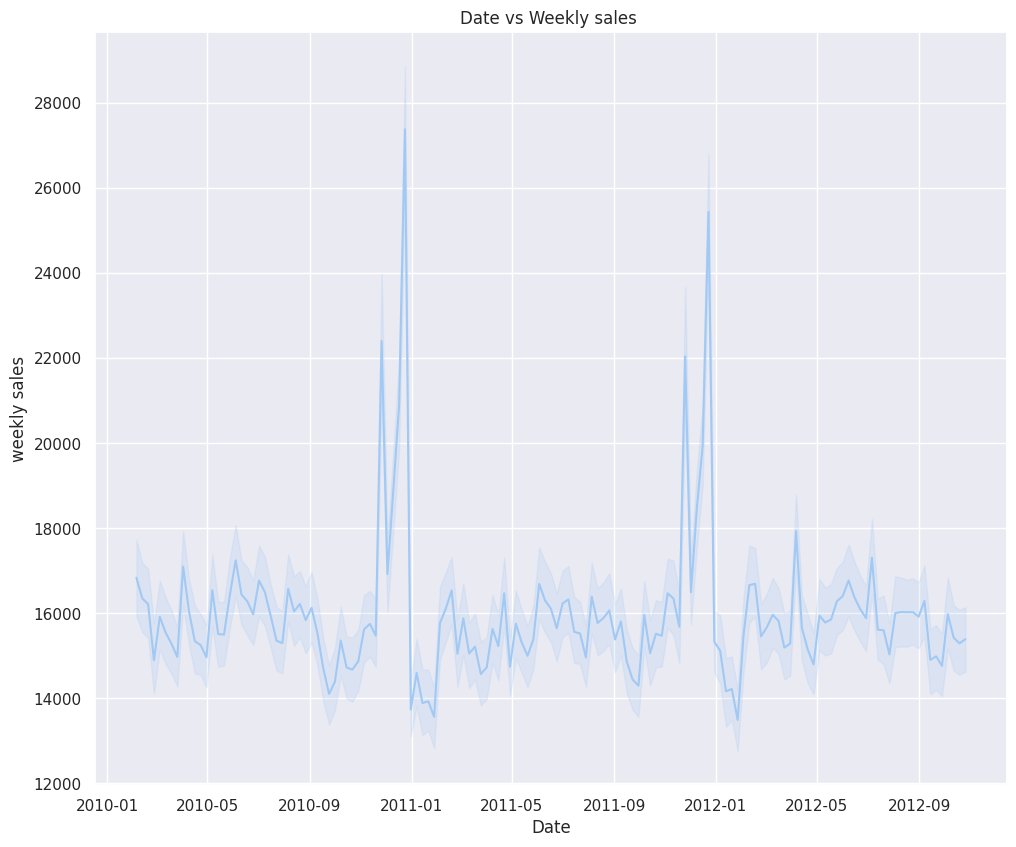

In [ ]:
plt.figure(figsize=(40,45))
plt.subplot(432)
sns.lineplot(x = 'Date',y = 'Weekly_Sales', data=stores_data)
plt.xlabel('Date')
plt.ylabel('weekly sales')
plt.title('Date vs Weekly sales ')


INTERPRITATIONS


1.   isholiday
2.   List item



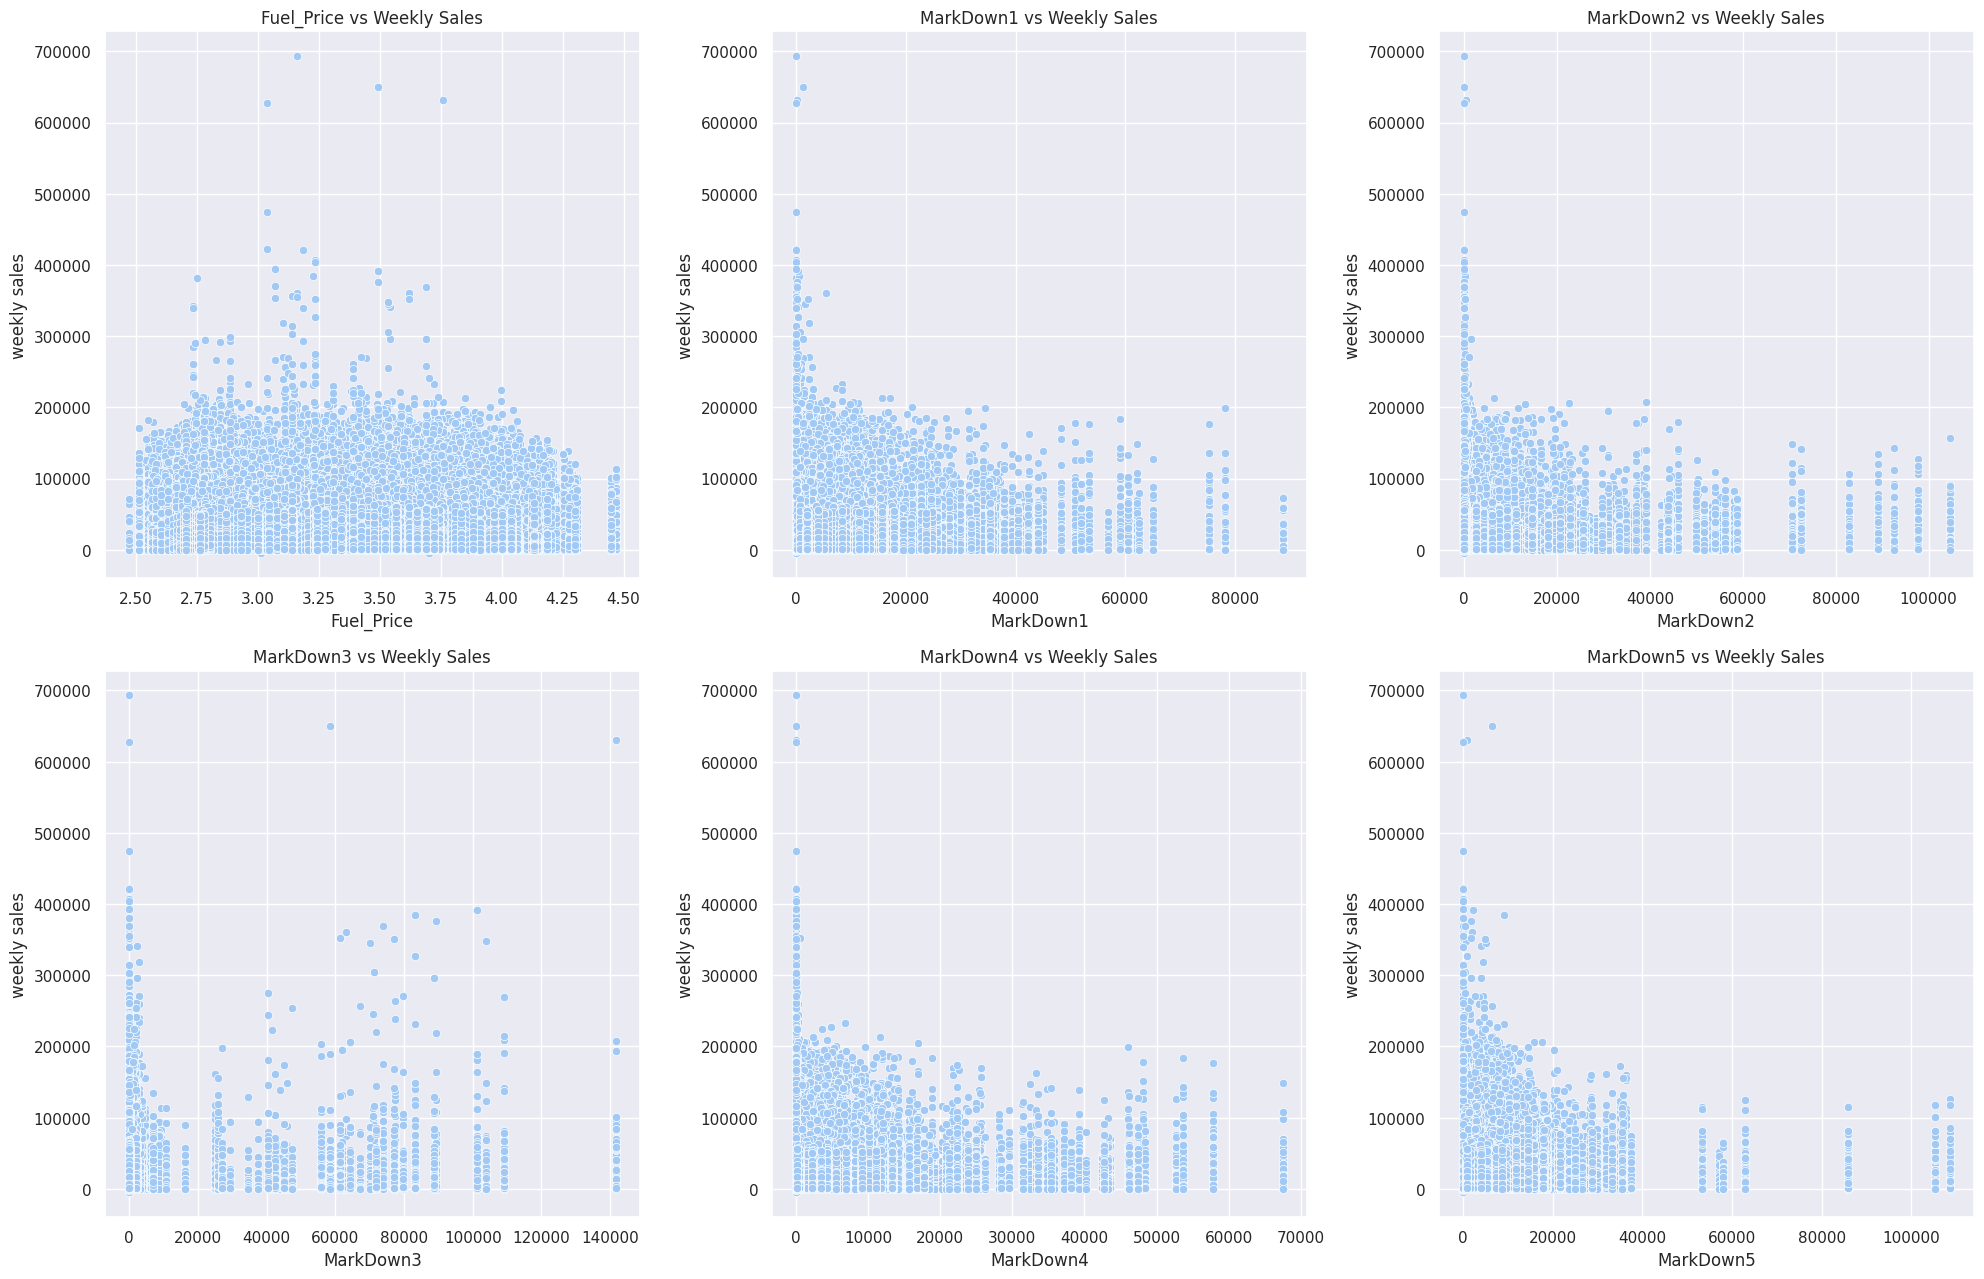

In [ ]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))

plt.subplot(434)
sns.scatterplot(x = 'Fuel_Price',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('Fuel_Price')
plt.ylabel('weekly sales')
plt.title('Fuel_Price vs Weekly Sales')

plt.subplot(435)
sns.scatterplot(x = 'MarkDown1',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('MarkDown1')
plt.ylabel('weekly sales')
plt.title('MarkDown1 vs Weekly Sales')

plt.subplot(436)
sns.scatterplot(x = 'MarkDown2',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('MarkDown2')
plt.ylabel('weekly sales')
plt.title('MarkDown2 vs Weekly Sales')

plt.subplot(437)
sns.scatterplot(x = 'MarkDown3',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('MarkDown3')
plt.ylabel('weekly sales')
plt.title('MarkDown3 vs Weekly Sales')

plt.subplot(438)
sns.scatterplot(x = 'MarkDown4',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('MarkDown4')
plt.ylabel('weekly sales')
plt.title('MarkDown4 vs Weekly Sales')

plt.subplot(439)
sns.scatterplot(x = 'MarkDown5',y = 'Weekly_Sales', data = stores_data)
plt.xlabel('MarkDown5')
plt.ylabel('weekly sales')
plt.title('MarkDown5 vs Weekly Sales')



plt.tight_layout()
plt.show()

#ENCODE

label_encoding = LabelEncoder()
df['color_codes_label_encoded'] = label_encoding.fit_transform(df['color_codes'])
df['rank_label_encoded'] = label_encoding.fit_transform(df['rank'])
df = df.drop(columns = ['rank', 'color_codes'])
df

In [ ]:
label_encoder = LabelEncoder()
#Date
stores_data['Date'] = label_encoder.fit_transform(stores_data['Date'])
#IsHoliday
stores_data['IsHoliday'] = label_encoder.fit_transform(stores_data['IsHoliday'])
#Type
stores_data['Type'] = label_encoder.fit_transform(stores_data['Type'])

In [ ]:
stores_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,0,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,0,1,24924.50,0,151315
1,1,0,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,0,2,50605.27,0,151315
2,1,0,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,0,3,13740.12,0,151315
3,1,0,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,0,4,39954.04,0,151315
4,1,0,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,0,5,32229.38,0,151315


#CORR

In [ ]:
stores_data.corr()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
Store,1.00,0.00,-0.05,0.07,-0.06,-0.03,-0.02,-0.04,-0.01,-0.21,0.21,-0.00,0.02,-0.09,0.23,-0.18
Date,0.00,1.00,0.15,0.77,0.47,0.13,0.05,0.30,0.42,0.08,-0.24,-0.01,0.00,-0.00,0.00,-0.01
Temperature,-0.05,0.15,1.00,0.14,-0.03,-0.18,-0.06,-0.05,-0.01,0.18,0.10,-0.16,0.00,-0.00,0.04,-0.06
Fuel_Price,0.07,0.77,0.14,1.00,0.30,0.03,0.02,0.17,0.22,-0.16,-0.03,-0.08,0.00,-0.00,0.03,0.00
MarkDown1,-0.06,0.47,-0.03,0.30,1.00,0.17,-0.01,0.84,0.42,0.01,-0.11,-0.00,0.00,0.05,-0.13,0.17
MarkDown2,-0.03,0.13,-0.18,0.03,0.17,1.00,-0.01,0.11,0.13,-0.00,-0.04,0.21,0.00,0.02,-0.06,0.08
MarkDown3,-0.02,0.05,-0.06,0.02,-0.01,-0.01,1.00,-0.01,0.04,-0.01,-0.02,0.27,0.00,0.04,-0.02,0.03
MarkDown4,-0.04,0.30,-0.05,0.17,0.84,0.11,-0.01,1.00,0.30,-0.00,-0.08,0.01,0.00,0.04,-0.09,0.13
MarkDown5,-0.01,0.42,-0.01,0.22,0.42,0.13,0.04,0.30,1.00,0.07,-0.12,-0.02,0.00,0.05,-0.13,0.15
CPI,-0.21,0.08,0.18,-0.16,0.01,-0.00,-0.01,-0.00,0.07,1.00,-0.30,-0.00,-0.01,-0.02,-0.07,-0.00


<Axes: >

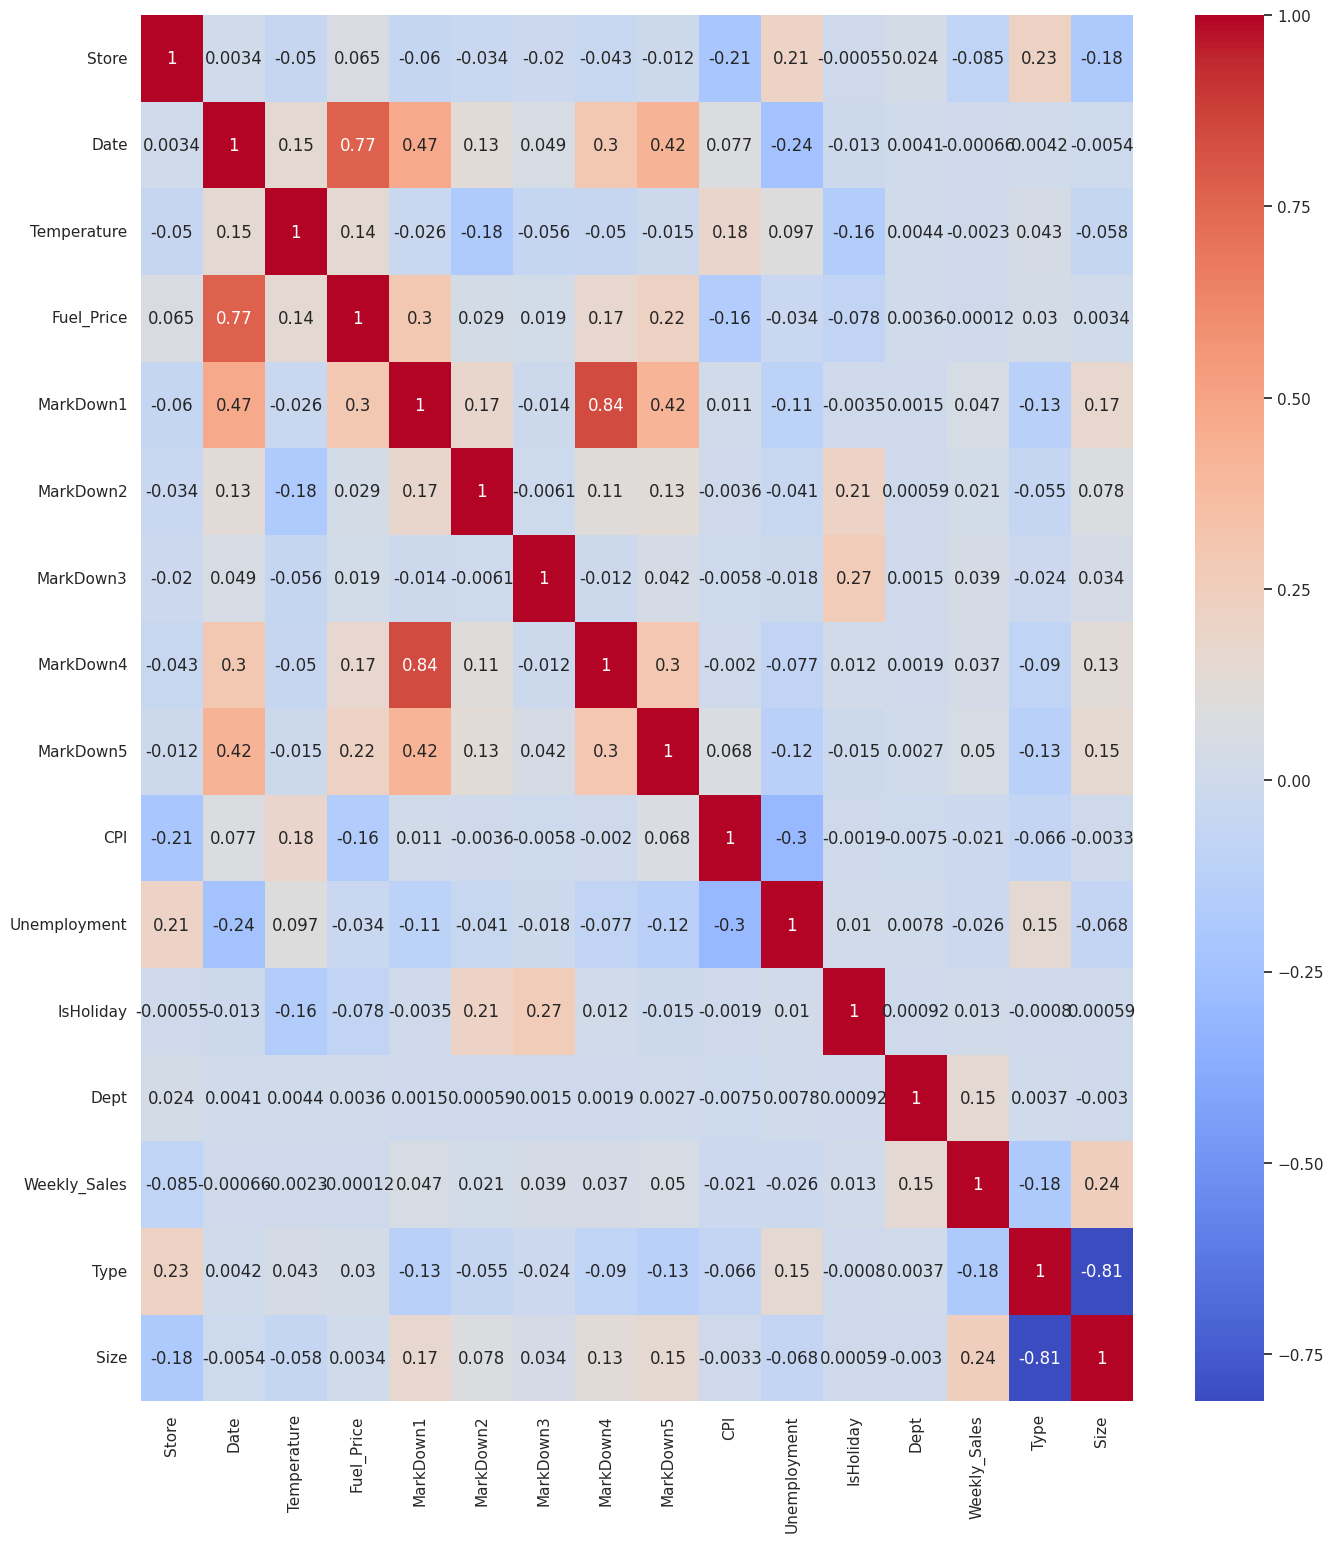

In [ ]:
plt.figure(figsize = (16, 18))
sns.heatmap(stores_data.corr(), cmap = 'coolwarm', annot = True)

In [ ]:

# correlation_matrix = corr_df.corr()
# fig = px.imshow(correlation_matrix, color_continuous_scale='Cividis',
#                 title="Correlation Matrix")
# fig.show()

#TRAIN TEST SPLIT

In [ ]:
X = stores_data.drop('Weekly_Sales',axis=1)
Y = stores_data['Weekly_Sales']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=70)

In [ ]:
X_train.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size
79971,9,21,78.55,2.67,0.00,0.00,0.00,0.00,0.00,214.78,6.44,0,32,1,125833
38732,4,128,79.14,3.26,4799.23,47.55,30.56,634.78,4648.91,130.70,4.08,0,23,0,205863
237167,25,1,19.64,2.77,0.00,0.00,0.00,0.00,0.00,204.39,8.19,1,4,1,128107
208031,22,13,63.81,2.98,0.00,0.00,0.00,0.00,0.00,135.96,8.35,0,9,1,119557
300113,31,90,65.46,3.37,0.00,0.00,0.00,0.00,0.00,217.33,7.44,0,23,0,203750


In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(337256, 15) (84314, 15) (337256,) (84314,)


In [ ]:
Y_train

79971     3380.45
38732    48322.37
237167   15435.62
208031   26653.99
300113   19761.87
           ...   
80768     6795.58
152635    1022.00
156988    8785.31
241432     750.16
258262   28372.33
Name: Weekly_Sales, Length: 337256, dtype: float64

#MACHINE LEARNING ALGORITHYM

In [ ]:
# Randomly sample
sampled_data = stores_data.sample(frac=0.05, random_state=42)
x=sampled_data.drop("Weekly_Sales",axis=1)
y=sampled_data["Weekly_Sales"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

Fit the regressor and get predictions
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

Display the performance of each model
print(models)

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
print(models)

 21%|██▏       | 9/42 [00:11<01:03,  1.92s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 76%|███████▌  | 32/42 [05:14<00:31,  3.20s/it]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 95%|█████████▌| 40/42 [05:54<00:08,  4.22s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 16862, number of used features: 15
[LightGBM] [Info] Start training from score 16344.076773


100%|██████████| 42/42 [05:59<00:00,  8.55s/it]

                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
XGBRegressor                                 0.87       0.87    8171.82   
ExtraTreesRegressor                          0.86       0.86    8593.01   
LGBMRegressor                                0.85       0.85    8739.70   
HistGradientBoostingRegressor                0.85       0.85    8842.38   
RandomForestRegressor                        0.85       0.85    8948.15   
BaggingRegressor                             0.83       0.83    9274.37   
GradientBoostingRegressor                    0.72       0.72   12015.95   
DecisionTreeRegressor                        0.66       0.66   13241.82   
ExtraTreeRegressor                           0.56       0.56   15166.75   
KNeighborsRegressor                          0.12       0.12   21363.39   
LarsCV                                       0.08       0.08   21882.64   
LassoLarsCV              

In [ ]:
# reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
# models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)
# print(models)

#TESTING ML MODELS

In [ ]:
# ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
ET_model=ExtraTreesRegressor().fit(X_train,Y_train)
Y_pred_train = ET_model.predict(X_train)
Y_pred_test = ET_model.predict(X_test)

r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)

r2_train, r2_test

(0.9999999999498377, 0.955398739322592)

In [ ]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GBR_model=GradientBoostingRegressor().fit(X_train,Y_train)
Y_pred_train = GBR_model.predict(X_train)
Y_pred_test = GBR_model.predict(X_test)

r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)

r2_train, r2_test

(0.7425257095284499, 0.7487128477598458)

In [ ]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
RFR_model=RandomForestRegressor().fit(X_train,Y_train)
Y_pred_train = RFR_model.predict(X_train)
Y_pred_test = RFR_model.predict(X_test)

r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)

r2_train, r2_test

(0.9942269823939353, 0.9634384524999267)

In [ ]:
# XGBRegressor
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_regressor.fit(X_train, Y_train)
Y_pred = xgb_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
rmse, r2

(11319.96494454398, 0.7491707530078573)

In [ ]:
#LinearRegression
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression().fit(X_train,Y_train)
Y_pred_train = LR_model.predict(X_train)
Y_pred_test = LR_model.predict(X_test)

r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)

r2_train, r2_test

(0.08730706864858695, 0.08626657598685783)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor().fit(X_train,Y_train)
Y_pred_train = DT_model.predict(X_train)
Y_pred_test = DT_model.predict(X_test)

r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)

r2_train, r2_test

(1.0, 0.9296834620614897)

In [ ]:
# R2 Score for ExtraTreesRegressor: 0.955398739322592
# R2 Score for GradientBoostingRegressor: 0.7487128477598458
# R2 Score for Random Forest Regression Model:  0.9629426923704322....
# R2 Score for XGBRegressor: 0.7491707530078573
# R2 Score for LinearRegression Model: 0.08626657598685783
# R2 Score for Decision Tree Regression Model:  0.9296834620614897

XGBRegressor                                 0.87       0.87    8171.82   
ExtraTreesRegressor                          0.86       0.86    8593.01   
LGBMRegressor                                0.85       0.85    8739.70   
HistGradientBoostingRegressor                0.85       0.85    8842.38   
RandomForestRegressor                        0.85       0.85    8948.15   
BaggingRegressor                             0.83       0.83    9274.37   

ALL MODELS

In [ ]:
mse_test = mean_squared_error(Y_test, Y_pred_test)
mse_test

18678266.124567788

##FEATURE IMPORTANCE

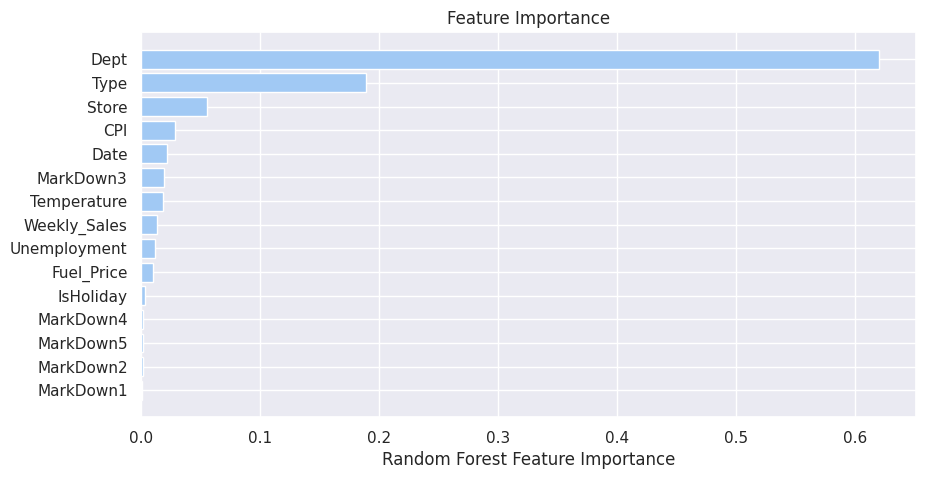

In [ ]:
sorted_idx = RFR_model.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(stores_data.columns[sorted_idx], RFR_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

###CONCLUSION


1.   The Feature with most importance are departments and the type of store
2.   List item



In [ ]:
X.shape

(421570, 15)

In [ ]:
input_data = [[0,1, 0,45,3,0,0,0,0,0,200,8,1,1,151315]]
predictions = RFR_model.predict(input_data)
print(predictions)

[49755.6881]


In [ ]:
stores_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,0,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,0,1,24924.50,0,151315
1,1,0,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,0,2,50605.27,0,151315
2,1,0,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,0,3,13740.12,0,151315
3,1,0,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,0,4,39954.04,0,151315
4,1,0,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,0,5,32229.38,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,142,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,0,93,2487.80,1,118221
421566,45,142,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,0,94,5203.31,1,118221
421567,45,142,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,0,95,56017.47,1,118221
421568,45,142,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,0,97,6817.48,1,118221


In [ ]:
mae